# Applying Quadprog to Draw the Efficient Frontier

The efficient frontier is the space of portfolios we would want to hold because there is no way of getting a higher return for the same level of volatility or for you to get a portfolio with equivalent return, but lower volatility. These portfolios lie on the efficient frontier and are portfolios which you cannot improve without changing either the volatility or return.

### Convex Optimisation to Draw the Efficient Frontier

Given a set of asset returns, volatilities and correlations we can plot the efficient frontier. We need to have expressions for the return and volatility for a portfolio. 

The expression for return on a portfolio is nothing more than the weighted average returns of the constituents of that portfolio:

$$R_p = \sum_{i=1}^k w_iR_i.$$

The expression for portfolio variance $\sigma^2$ is a generalisation of the formula we've already seen in the 2-asset case:

$$\sigma^2_p = \sum_{i=1}^k \sum_{j=1}^kw_iw_j\sigma_i\sigma_j\rho_{ij},$$

$$\sigma^2_p  = \sum_{i=1}^k \sum_{j=1}^kw_iw_j\sigma_{ij},$$

where $\sigma_{ij}$ is the covariance between the two assets.

### Matrix Form Expression

$$R_p = \mathbf{w}^\intercal \mathbf{R}$$

$$\sigma_p^2 = \mathbf{w}^\intercal \mathbf{\Sigma}\mathbf{w}$$

### Plotting the Efficient Frontier

A portfolio on the efficient frontier is on with the minimum volatility for a certain level of return. The expression which finds such portfolios is given in quadratic form as

$$\text{Minimise} \colon \frac12 \mathbf{w}^\intercal \mathbf{\Sigma} \mathbf{w}$$

subject to the constraints

$$\mathbf{w}^\intercal \mathbf{R} = \mathbf{r}_0,$$
$$\mathbf{w}^\intercal \mathbf{1} = \mathbf{1},$$
$$\mathbf{w} \leq 0.$$

To a quadratic optimiser we supply a set of constraints and an objective function. The objective function is to minimise the volatility and the constraints are the individual returns of each asset, the weights add up to one and the weights must be greater than zero.

## Lab Session - Efficient Frontier Part 2

In [1]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

In [2]:
ind = erk.get_ind_returns()
er = erk.annualise_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

In [3]:
def portfolio_return(weights, returns):
    ''''
    Weights -> Returns
    '''
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    '''
    Weights -> Vol
    '''
    return (weights.T @ covmat @ weights)**0.5

In [4]:
l = ['Food', 'Beer', 'Smoke', 'Coal']
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [5]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [6]:
weights = np.repeat(1/4, 4)
erk.portfolio_return(weights, er[l])

0.19511097196038385

In [7]:
erk.portfolio_vol(weights, cov.loc[l, l])

0.05505919577643704

### 2-Asset Frontier

In [8]:
l = ['Games', 'Fin']

In [9]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

In [10]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [11]:
len(weights)

20

In [12]:
l

['Games', 'Fin']

<AxesSubplot:xlabel='Vol', ylabel='R'>

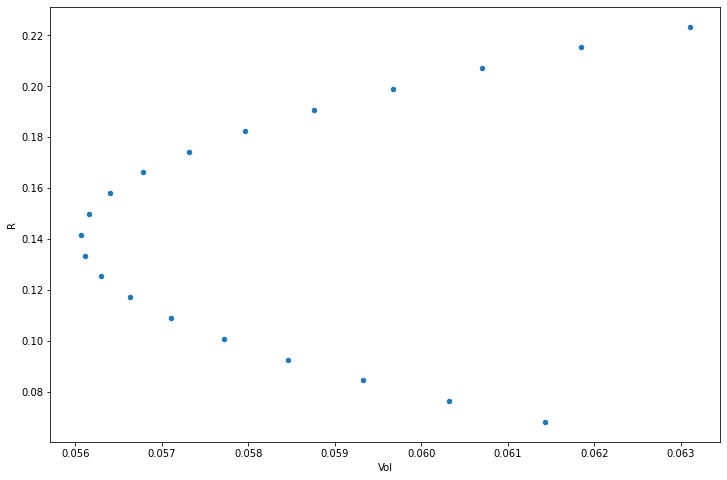

In [13]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l, l]) for w in weights]
ef = pd.DataFrame({'R': rets, 'Vol': vols})
ef.plot.scatter(x = 'Vol', y = 'R', figsize = (12, 8))

<AxesSubplot:xlabel='Volatility'>

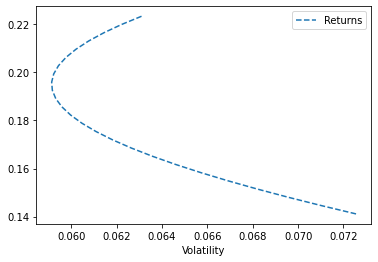

In [14]:
l = ['Fin', 'Beer']
erk.plot_ef2(25, er[l], cov.loc[l, l], style = '--')

# Lab Session - N-Asset Efficient Frontier

In [15]:
ind = erk.get_ind_returns()
er = erk.annualise_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

```py
def plot_ef(n_points, er, cov, style = '.-'):
    '''
    Plots the N-asset efficient frontier
    '''
    weights = minimise_vol(target_return)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        'Returns': rets,
        'Volatility': vols
        })
    return ef.plot.line(x = 'Volatility', y = 'Returns', style = style)
```

In [16]:
from scipy.optimize import minimize

<AxesSubplot:xlabel='Volatility'>

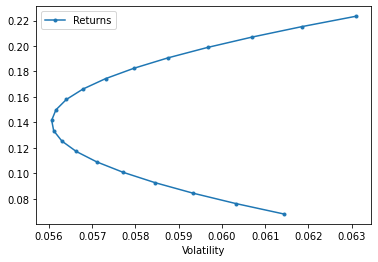

In [17]:
l = ['Games', 'Fin']
erk.plot_ef2(20, er[l], cov.loc[l, l])

In [18]:
def minimise_vol(target_return, er, cov):
    '''
    target_r -> W
    '''
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0), ) * n
    return_is_target = {
        'type': 'eq',
        'args': (er, ),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    results = minimize(erk.portfolio_vol, init_guess,
                        args = (cov, ), method = 'SLSQP',
                        options = {'disp': False},
                        constraints = (return_is_target, weights_sum_to_1),
                        bounds = bounds
                        )
    return results.x

In [19]:
w14 = minimise_vol(0.14, er[l], cov.loc[l, l])
vol14 = erk.portfolio_vol(w14, cov.loc[l, l])
vol14

0.05606089738491284

In [20]:
w14

array([0.53732595, 0.46267405])

In [21]:
w14 = erk.minimise_vol(0.14, er[l], cov.loc[l, l])
vol14 = erk.portfolio_vol(w14, cov.loc[l, l])
vol14

0.05606089738491284

In [22]:
w14

array([0.53732595, 0.46267405])

In [37]:
def optimal_weights(n_points, er, cov):
    '''
    -> list of weight sto run the optimiser on to minimise the vol
    '''
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimise_vol(target_return, er, cov) for target_return in target_rs]
    return weights

In [34]:
def plot_ef(n_points, er, cov, style = '.-'):
    '''
    Plots the N-asset efficient frontier
    '''
    weights = optimal_weights(n_points, er, cov)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        'Returns': rets,
        'Volatility': vols
        })
    return ef.plot.line(x = 'Volatility', y = 'Returns', style = style)

In [35]:
l = ['Smoke', 'Fin', 'Games', 'Coal']
optimal_weights(25, er[l], cov.loc[l,l])

[array([2.59453257e-11, 9.10741145e-17, 1.00000000e+00, 0.00000000e+00]),
 array([2.82558544e-01, 3.77484971e-04, 7.07876265e-01, 9.18770546e-03]),
 array([0.27459505, 0.06550564, 0.63730009, 0.02259922]),
 array([0.26454234, 0.12491864, 0.57173002, 0.038809  ]),
 array([0.25544391, 0.18491584, 0.50499221, 0.05464804]),
 array([0.24434724, 0.25412834, 0.43493564, 0.06658877]),
 array([0.23775853, 0.305169  , 0.3709207 , 0.08615176]),
 array([0.22889874, 0.36533451, 0.3038786 , 0.10188814]),
 array([0.22011103, 0.42534718, 0.23685706, 0.11768473]),
 array([0.20800597, 0.48559522, 0.17264357, 0.13375524]),
 array([0.20414828, 0.54182261, 0.10334589, 0.15068322]),
 array([0.19331722, 0.6053109 , 0.03621488, 0.165157  ]),
 array([0.1668322, 0.6379176, 0.       , 0.1952502]),
 array([1.19574966e-01, 6.38255917e-01, 6.53698794e-18, 2.42169117e-01]),
 array([0.07290136, 0.63765814, 0.        , 0.2894405 ]),
 array([2.58620854e-02, 6.37646868e-01, 7.23612908e-17, 3.36491047e-01]),
 array([0.00

<AxesSubplot:xlabel='Volatility'>

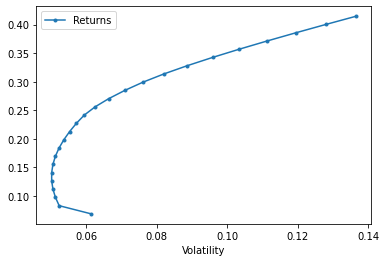

In [36]:
plot_ef(25, er[l], cov.loc[l,l])

<AxesSubplot:xlabel='Volatility'>

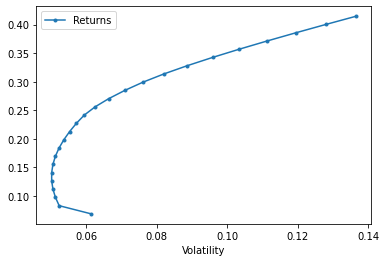

In [38]:
erk.plot_ef(25, er[l], cov.loc[l,l])